In [1]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import math

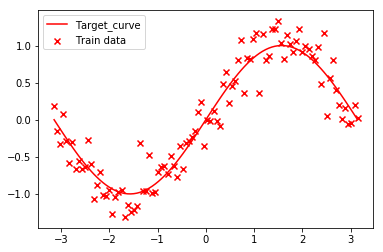

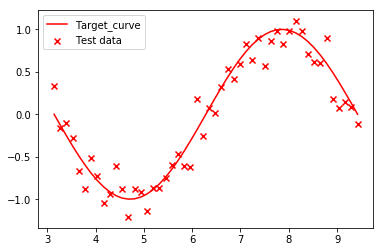

In [2]:
#Train Set
x=np.linspace(-math.pi,math.pi,100)
y_line=np.sin(x)
y=y_line+0.2*np.random.randn(x.shape[0])

#Test Set
x_test=np.linspace(math.pi,3*math.pi,50)
y_line_test=np.sin(x_test)
y_test=y_line_test+0.2*np.random.randn(x_test.shape[0])

plt.figure(1)
plt.scatter(x,y, color='red', label='Train data', marker='x')
plt.plot(np.array(x),np.array(y_line), color='red', label='Target_curve')
plt.legend(loc='best')
plt.figure(2)
plt.scatter(x_test,y_test, color='red', label='Test data', marker='x')
plt.plot(np.array(x_test),np.array(y_line_test), color='red', label='Target_curve')
plt.legend(loc='best')
plt.show()

In [3]:
data=np.zeros((100,2))

In [4]:
data[:,0]=x
data[:,1]=y

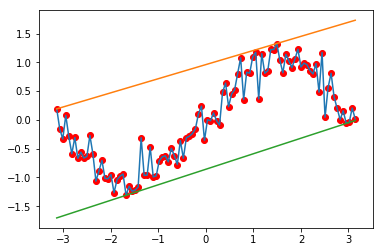

In [5]:
plt.figure()
data0 = data.copy()
################### high trend line ################### 
data1 = data0.copy()
while len(data1)>2:
    ordinary_linear = linear_model.LinearRegression()
    ordinary_linear.fit(data1[:,0].reshape((-1,1)), data1[:,1])
    a,b=ordinary_linear.coef_, ordinary_linear.intercept_ 
    data1 = data1[data1[:,1] > a * data1[:,0] + b]
high_linear = linear_model.LinearRegression()
high_linear.fit(data1[:,0].reshape((-1,1)), data1[:,1])
a,b=high_linear.coef_, high_linear.intercept_ 
high = a * data0[:,0] + b
################### low trend line ################### 
data1 = data0.copy()
while len(data1)>2:
    ordinary_linear = linear_model.LinearRegression()
    ordinary_linear.fit(data1[:,0].reshape((-1,1)), data1[:,1])
    a,b=ordinary_linear.coef_, ordinary_linear.intercept_ 
    data1 = data1[data1[:,1] < a * data1[:,0] + b]
low_linear = linear_model.LinearRegression()
low_linear.fit(data1[:,0].reshape((-1,1)), data1[:,1])
a,b=low_linear.coef_, low_linear.intercept_ 
low = a * data0[:,0] + b
################### plot ################### 
plt.plot(data0[:,0],data0[:,1])
plt.scatter(data0[:,0],data0[:,1], color='red')
plt.plot(data0[:,0],high)
plt.plot(data0[:,0], low)
plt.show()